In [1]:
!pip install torch_geometric

In [2]:
import numpy as np
import torch
from torch_geometric.data import Data
import gymnasium as gym
from gymnasium import spaces
from gerry_environment import FrankenmanderingEnv
from graph_initiator import build_inchworm_init_data, build_inchworm_soc_init_data
from render_graph import render_graph

#Inch Worm Test

In [3]:
import matplotlib.pyplot as plt

def run_inchworm(env, districts, eps_indiff =0, eps_assim=3, eps_backfire=-3 , eps_irrel=200, eps_amb=0,
                                                            assim_shift=1, back_shift=-1, indiff_shift=0, amb_shift=0, irr_shift=0):
    history = []
    for t, district in enumerate(districts, 1):
        # Build assignment matrix
        assignment = np.zeros((env.num_voters, env.num_districts), dtype=np.float32)
        for v in range(env.num_voters):
            if v in district:
                assignment[v] = 1.0
            # else:
            #     assignment[v, 1] = 1.0

        obs, reward, terminated, truncated, info = env.step(assignment,
                                                            eps_indiff, eps_assim, eps_backfire , eps_irrel, eps_amb,
                                                            assim_shift, back_shift, indiff_shift, amb_shift, irr_shift)

        fig = render_graph(obs)
        plt.show()
        opinions = obs.opinion.squeeze().tolist()
        reps = obs.reps
        history.append((opinions, reps))

        print(f"t={t}, reps={reps}, opinions={opinions}, reward={reward}")
    return history

Inchworm with empty social graph

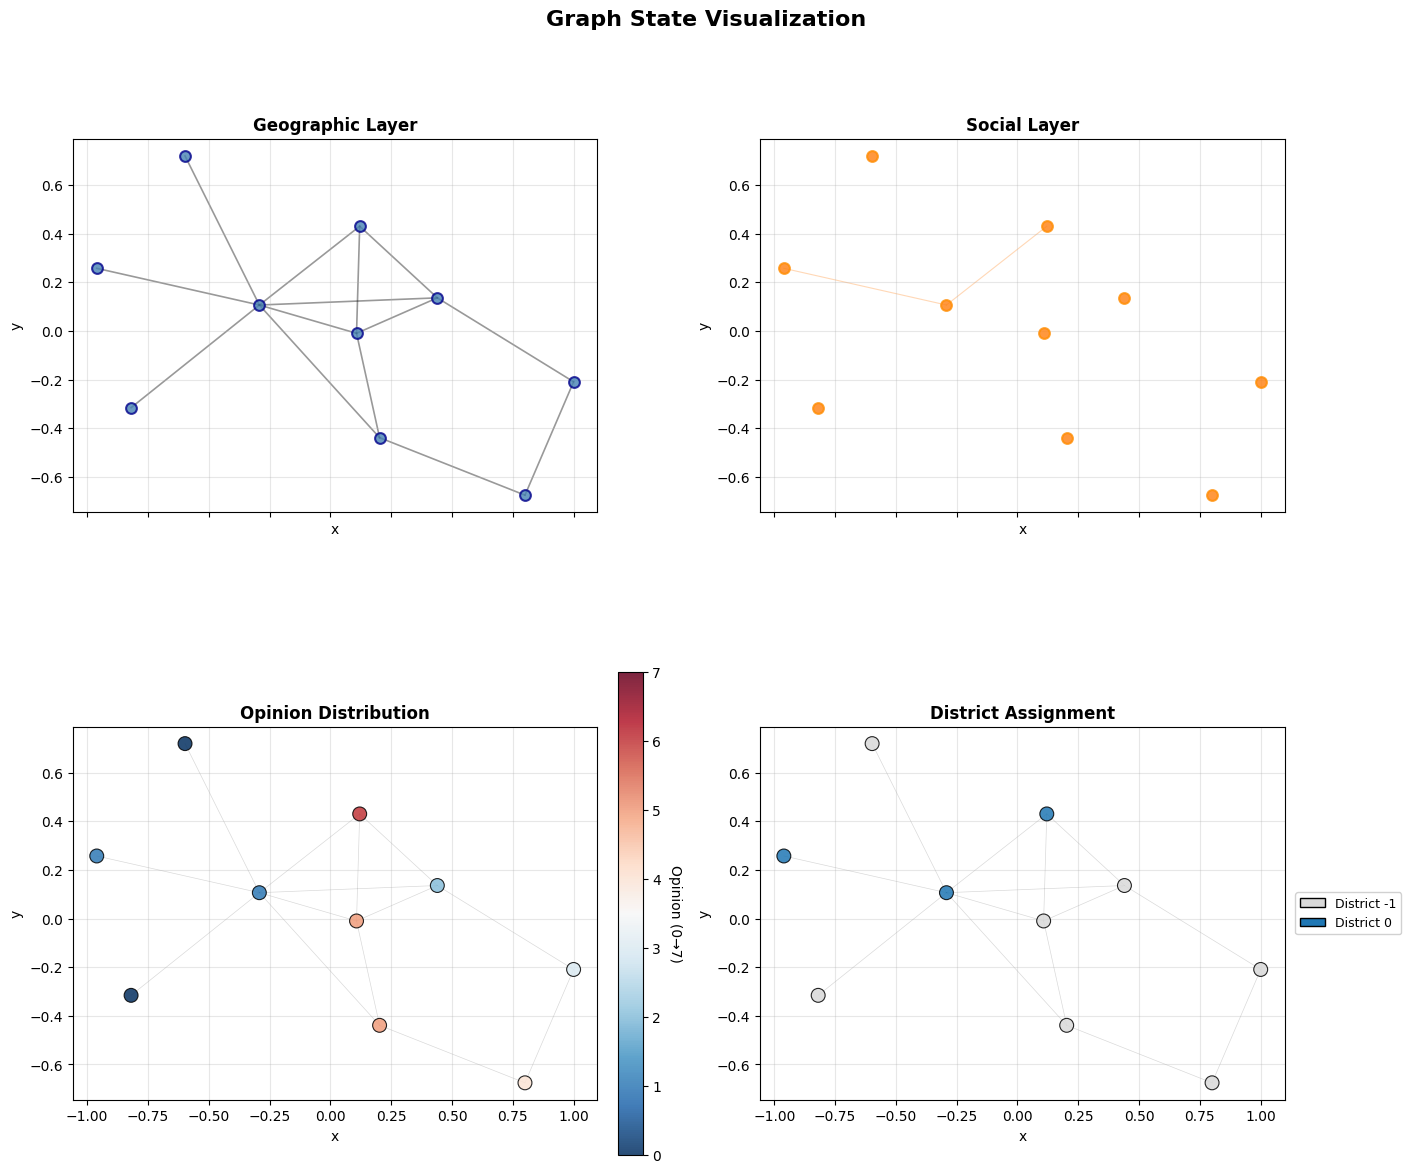

t=1, reps=[3], opinions=[0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0], reward=1.6800003051757812


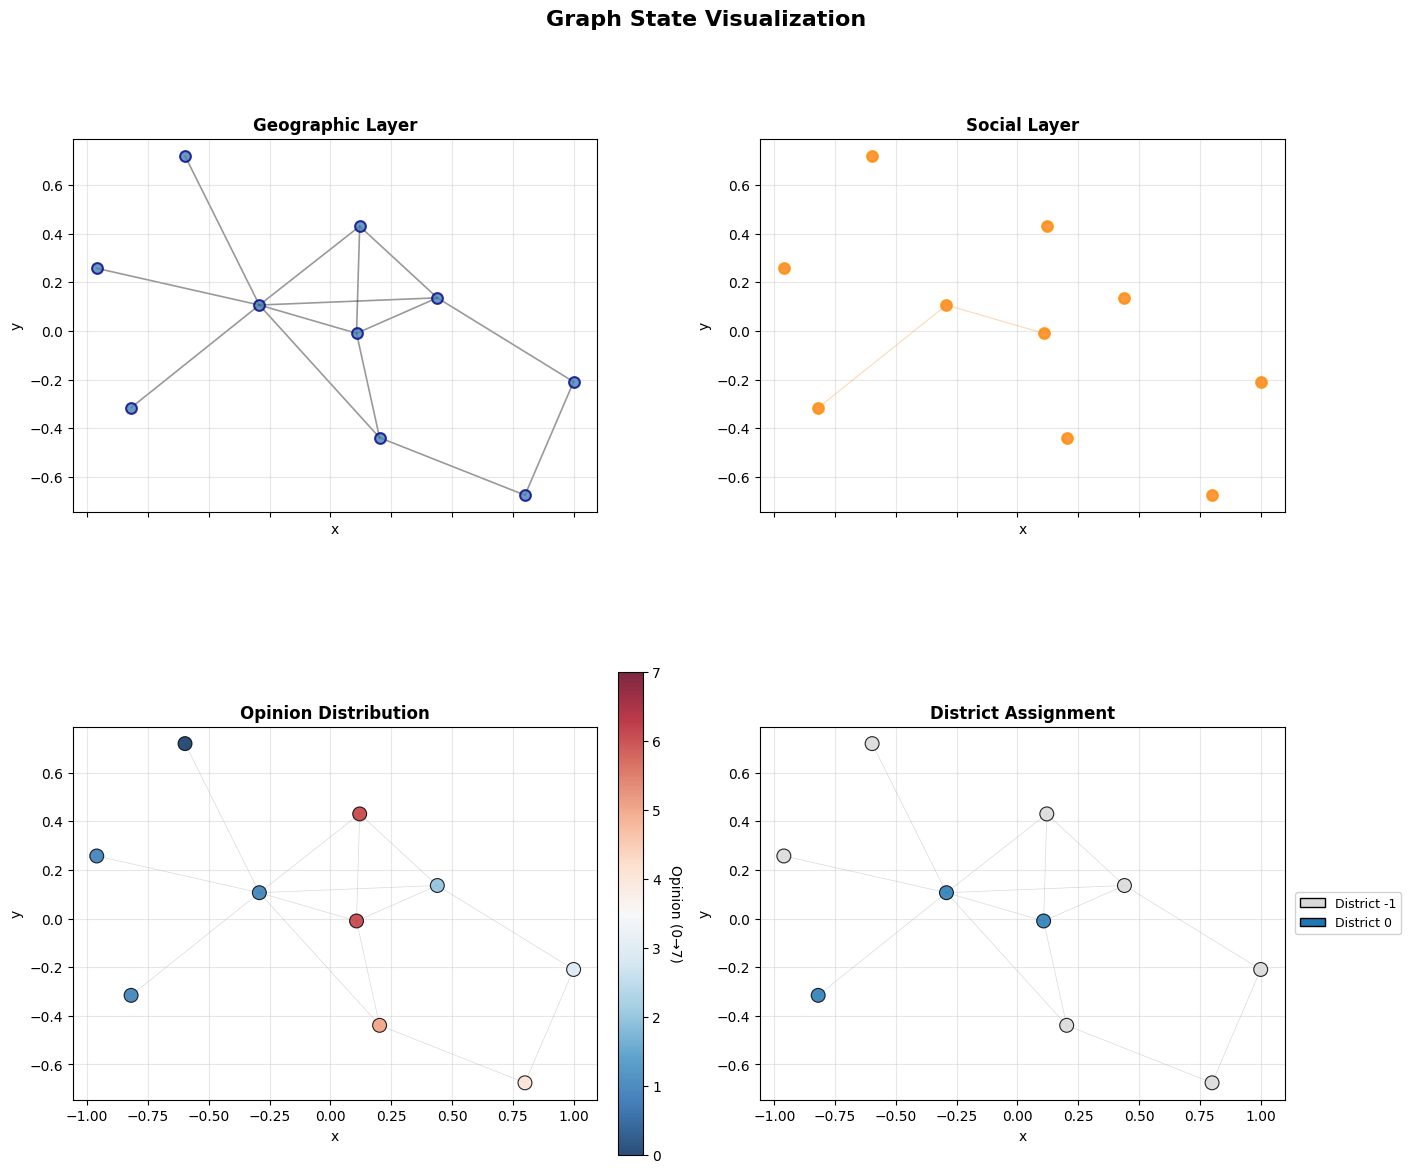

t=2, reps=[3], opinions=[0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0], reward=1.6442856788635254


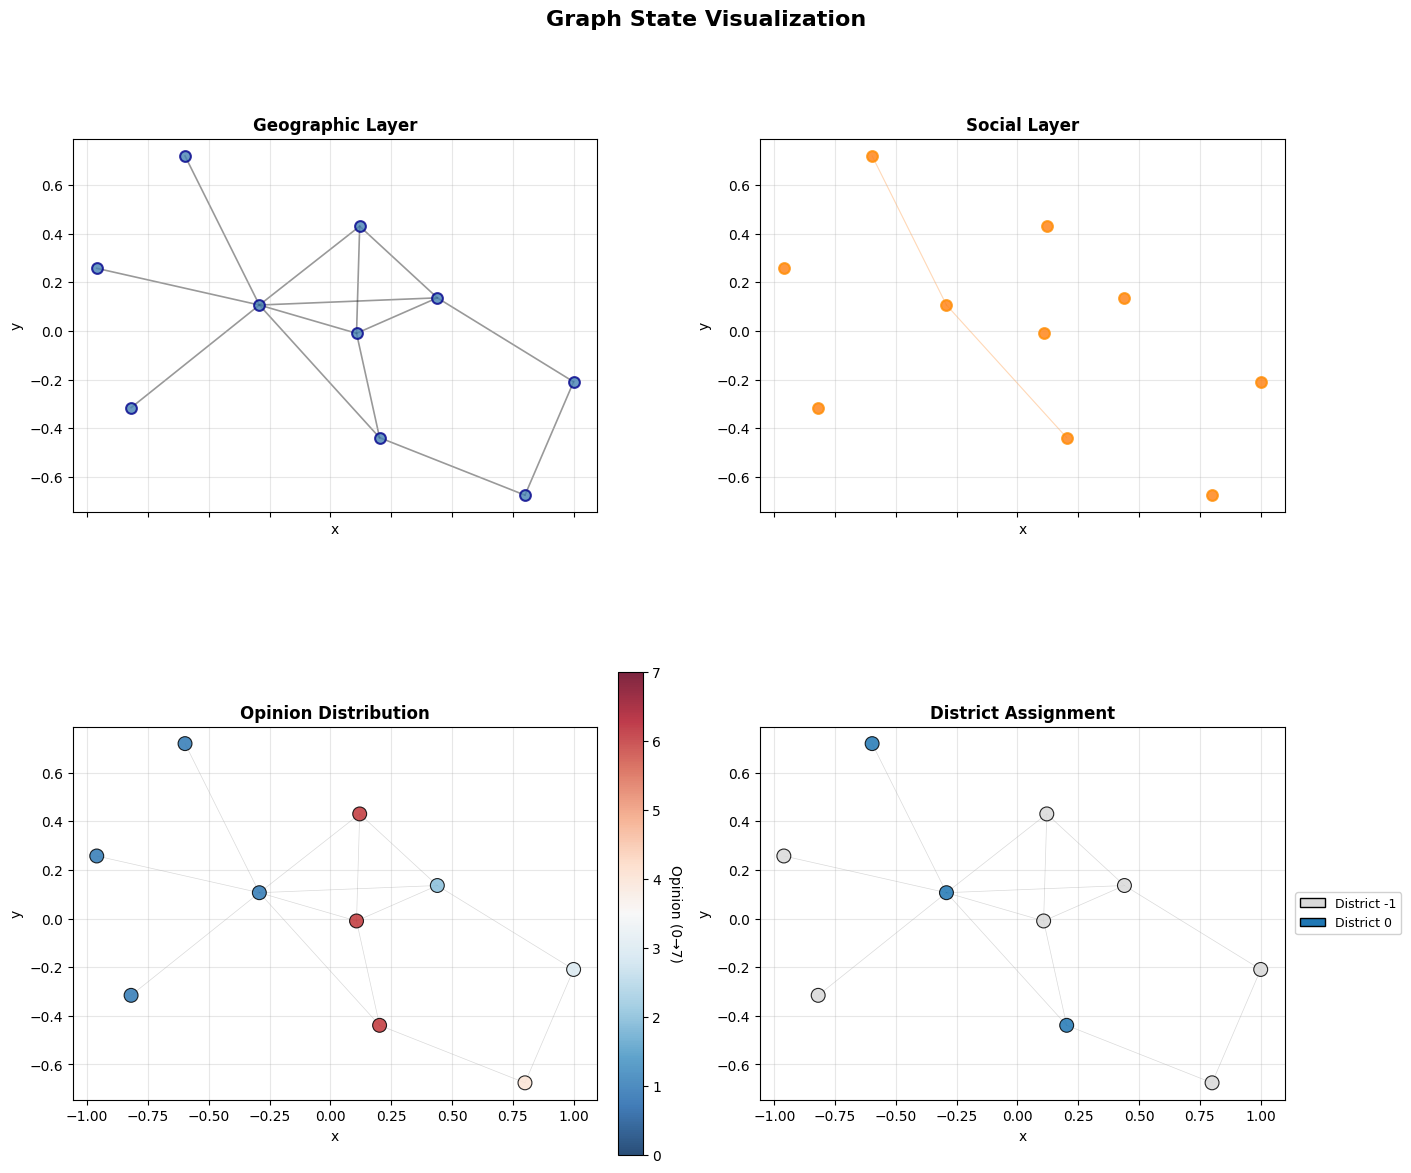

t=3, reps=[3], opinions=[1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 6.0, 6.0, 6.0], reward=1.679999828338623


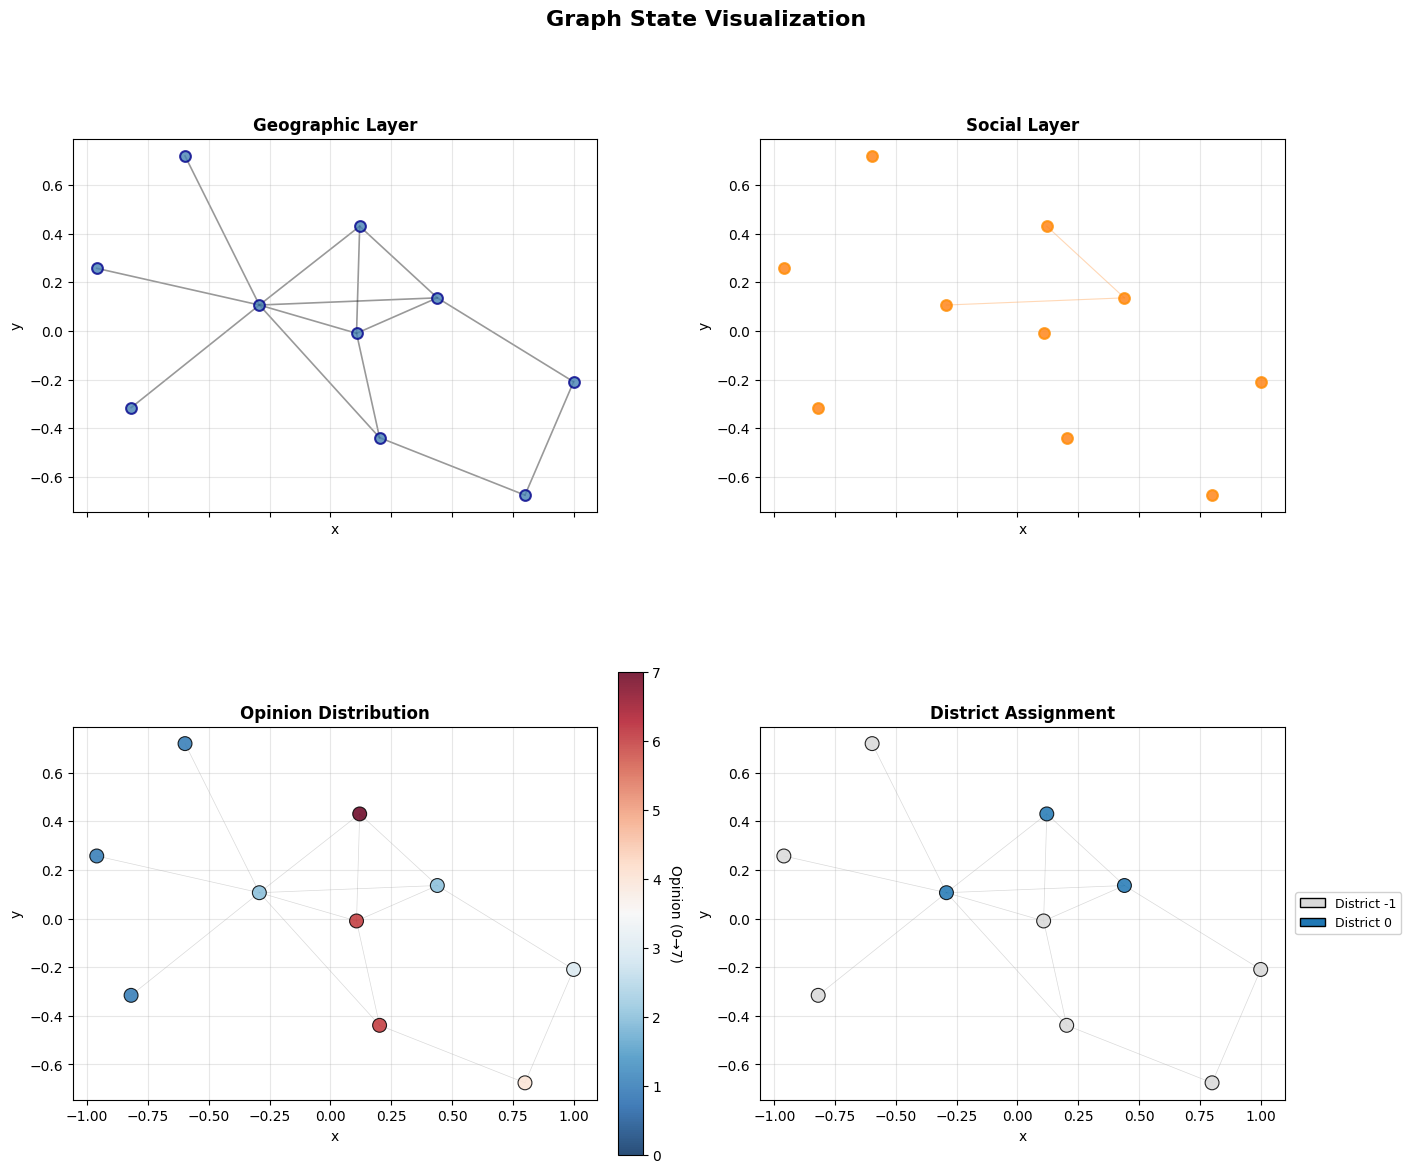

t=4, reps=[4], opinions=[1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 4.0, 6.0, 6.0, 7.0], reward=-0.3557143211364746


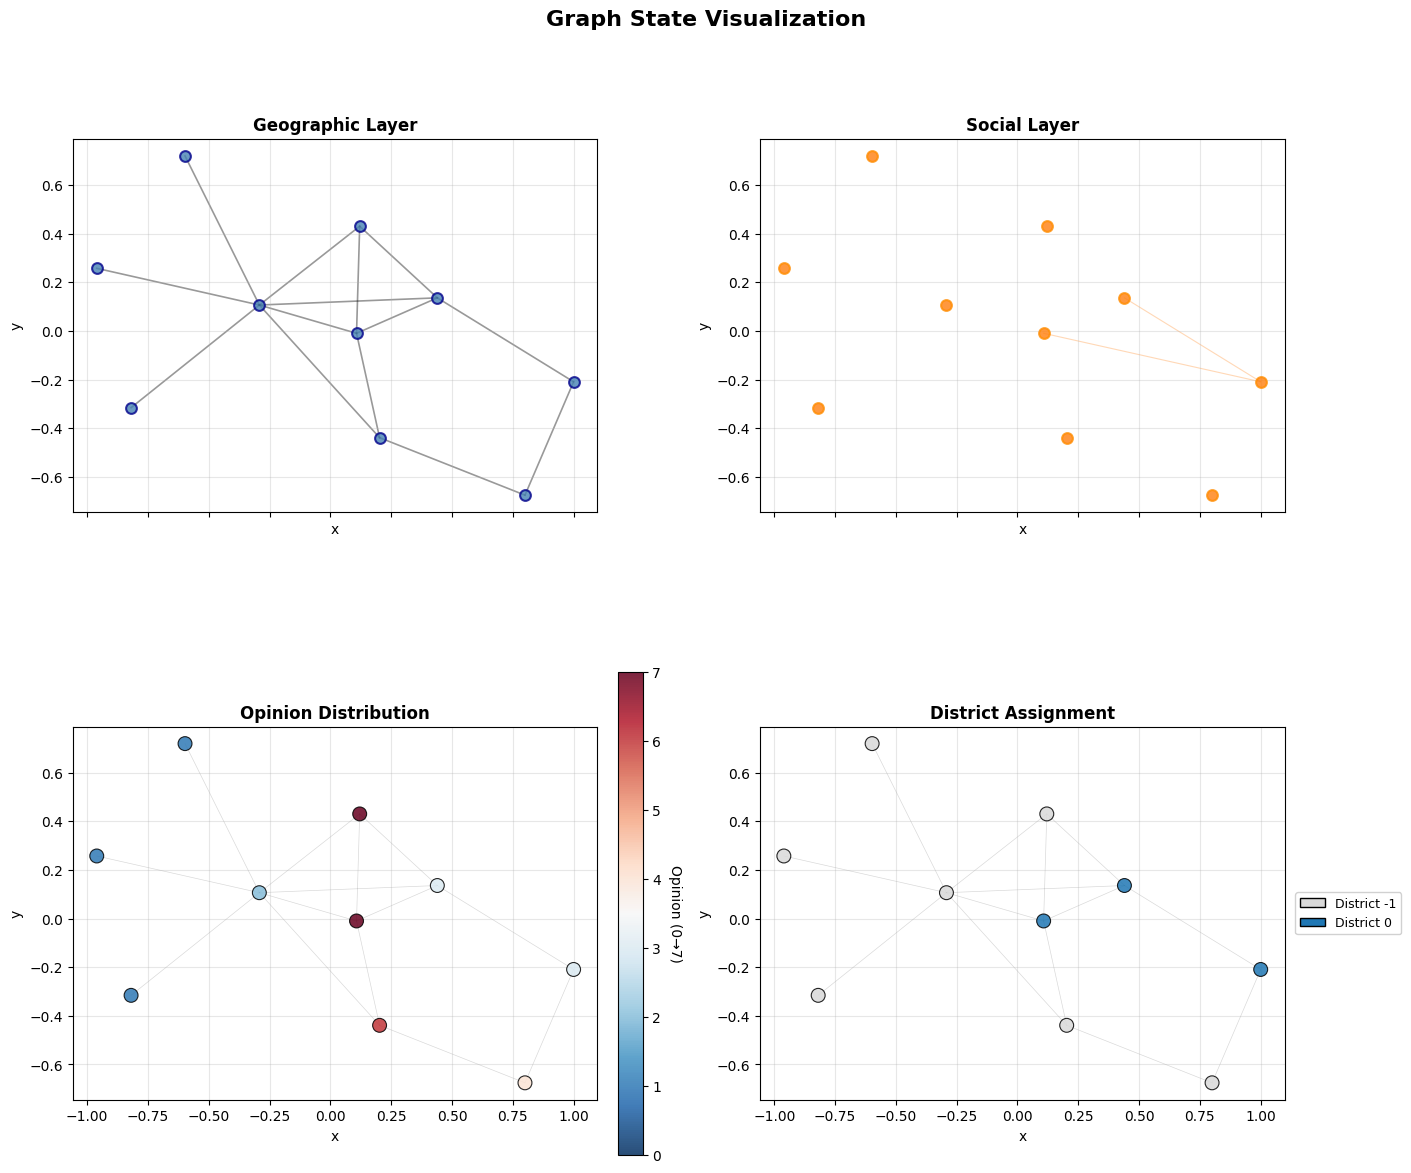

t=5, reps=[5], opinions=[1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0], reward=-0.2842857837677002


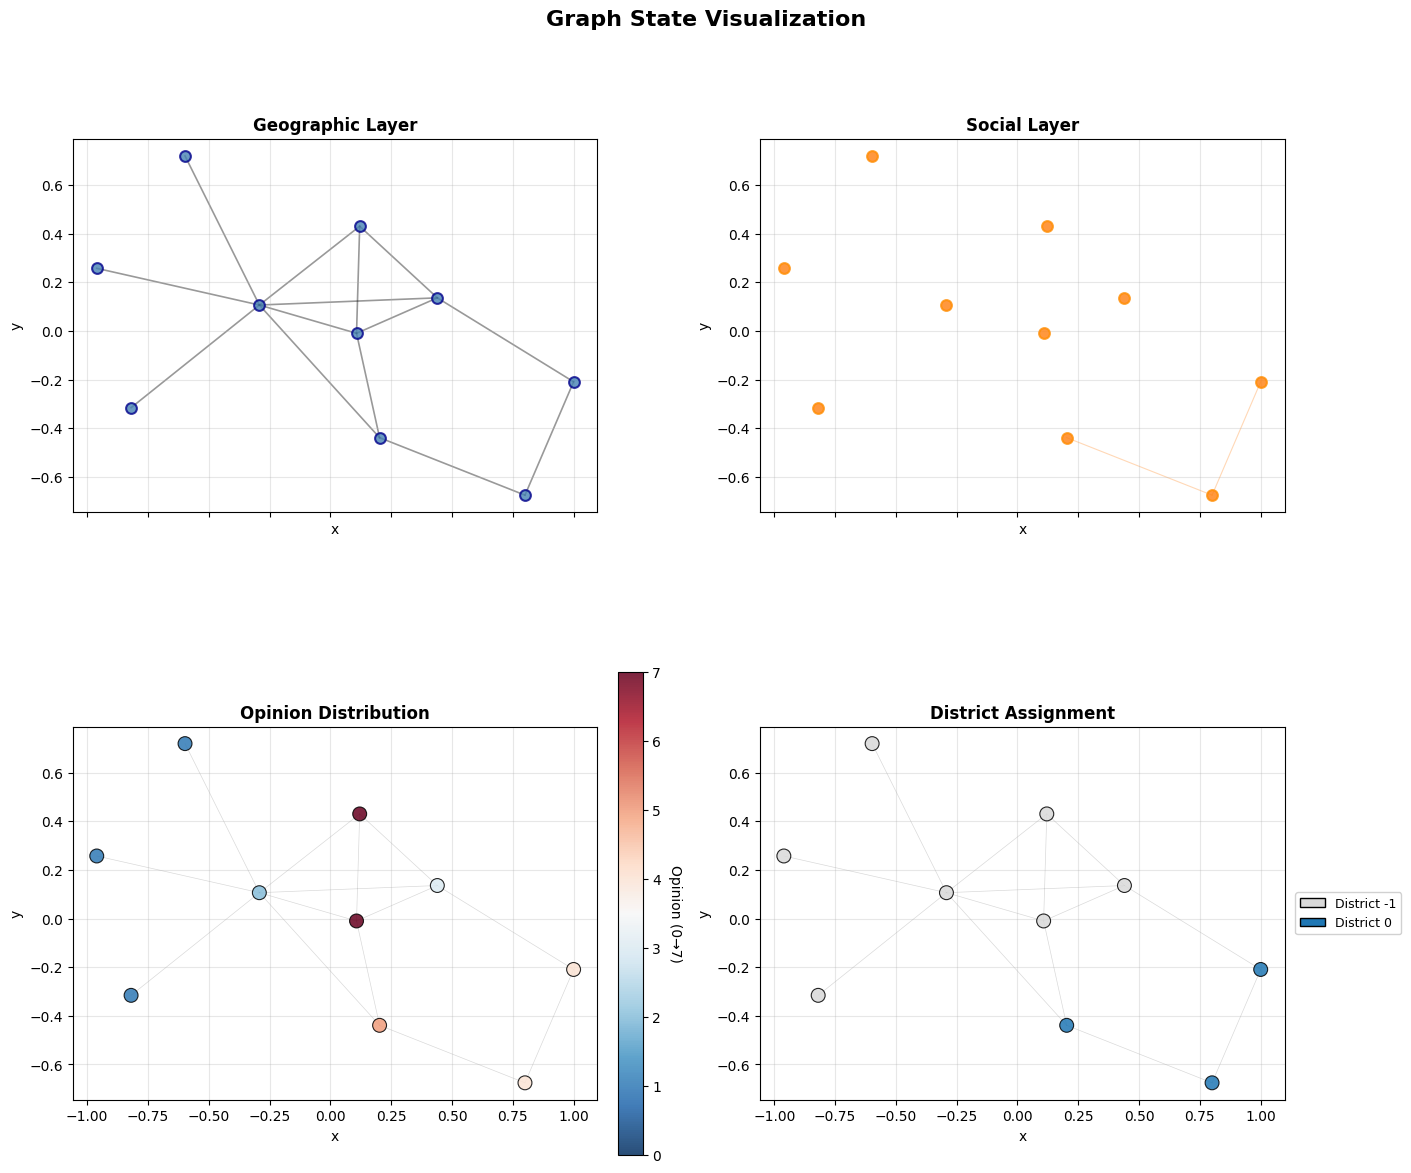

t=6, reps=[6], opinions=[1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 7.0, 7.0], reward=-0.17714285850524902


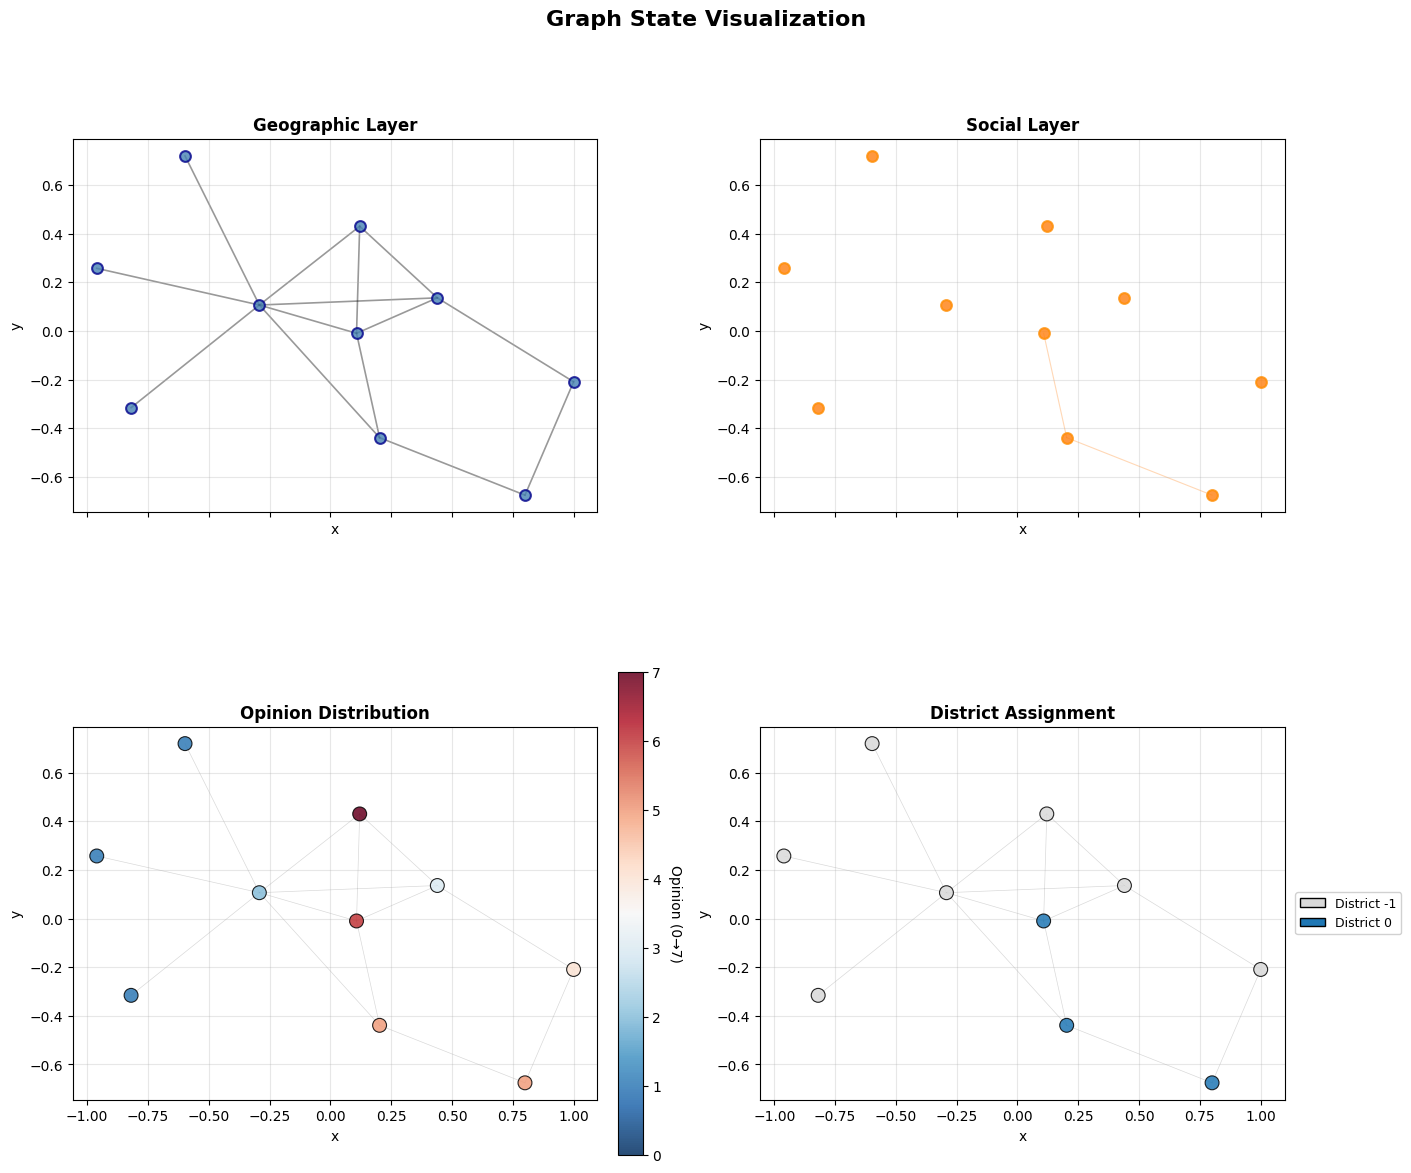

t=7, reps=[7], opinions=[1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 6.0, 7.0], reward=1.7514286041259766


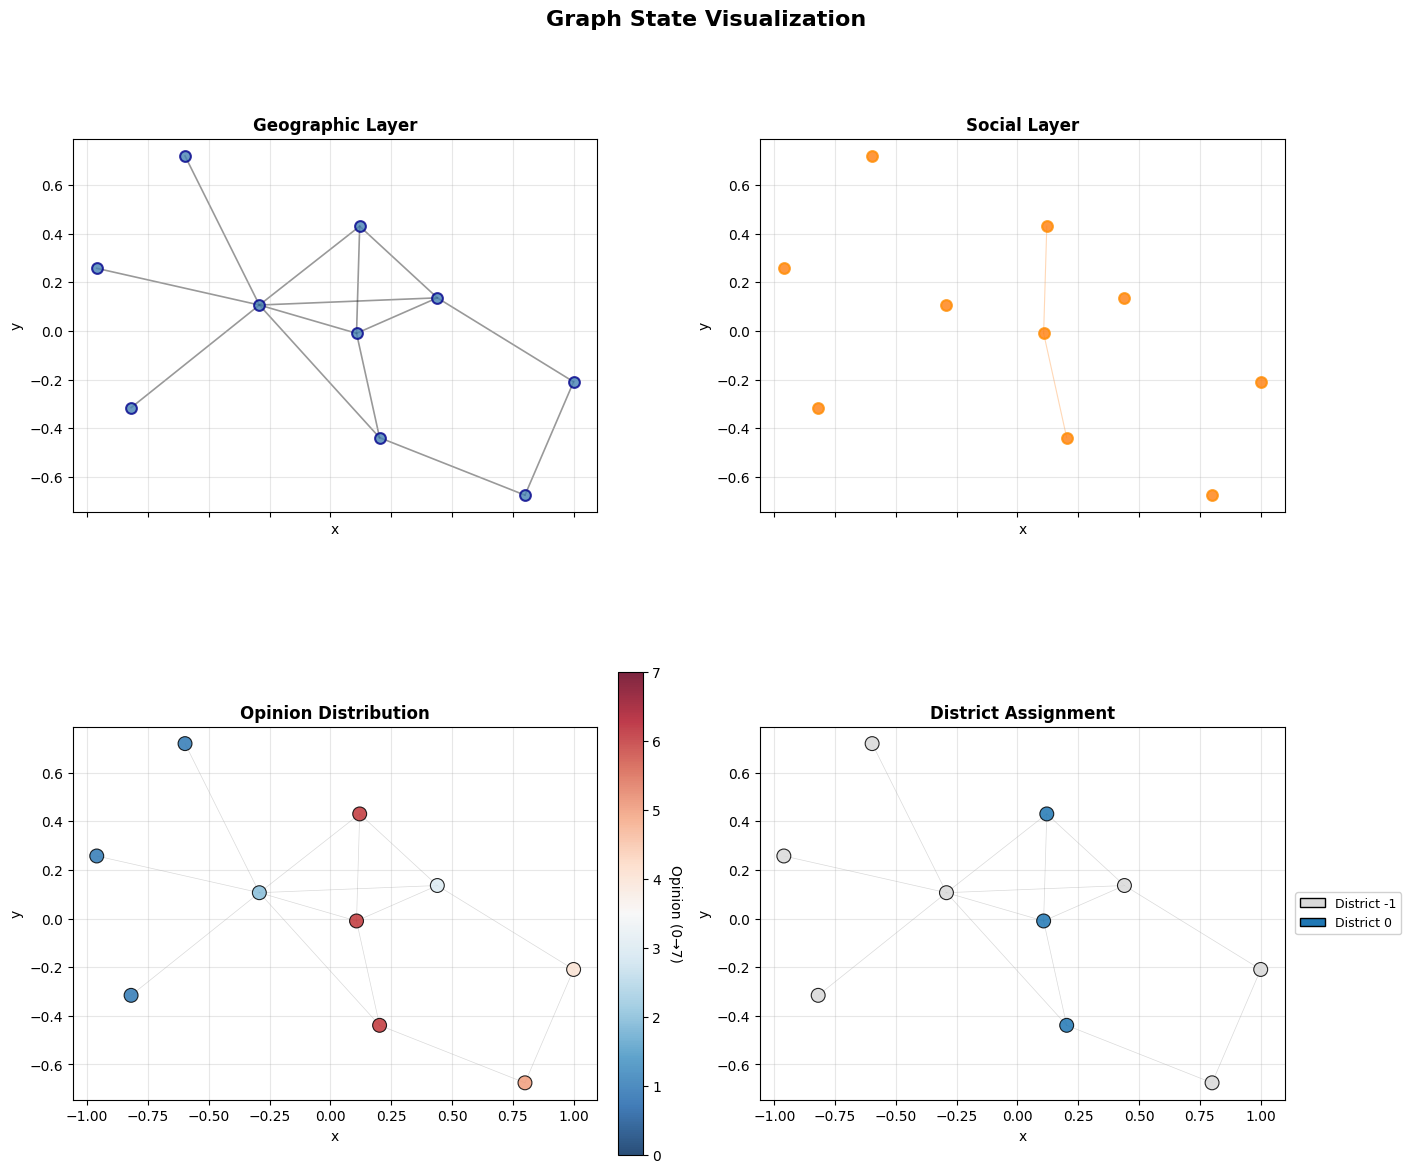

t=8, reps=[8], opinions=[1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 6.0], reward=1.7157142162322998


In [4]:
init_inch_data, G_inch = build_inchworm_init_data()
num_voters = init_inch_data.opinion.shape[0]
num_districts = 1
target_opinion = [1,1,1,2,3,4,5,6,6,6]
env = FrankenmanderingEnv(num_voters=num_voters,
                          num_districts=num_districts,
                          FrankenData=init_inch_data,
                          opinion_dim = 1,
                    target_opinion =target_opinion
                                               )

obs, _ = env.reset()

districts = [
    [2,3,9],
    [1,3,8],
    [0,3,7],
    [3,4,9],
    [4,5,8],
    [5,6,7],
    [6,7,8],
    [7,8,9]
]
history = run_inchworm(env, districts)

Inchworm test with social graph

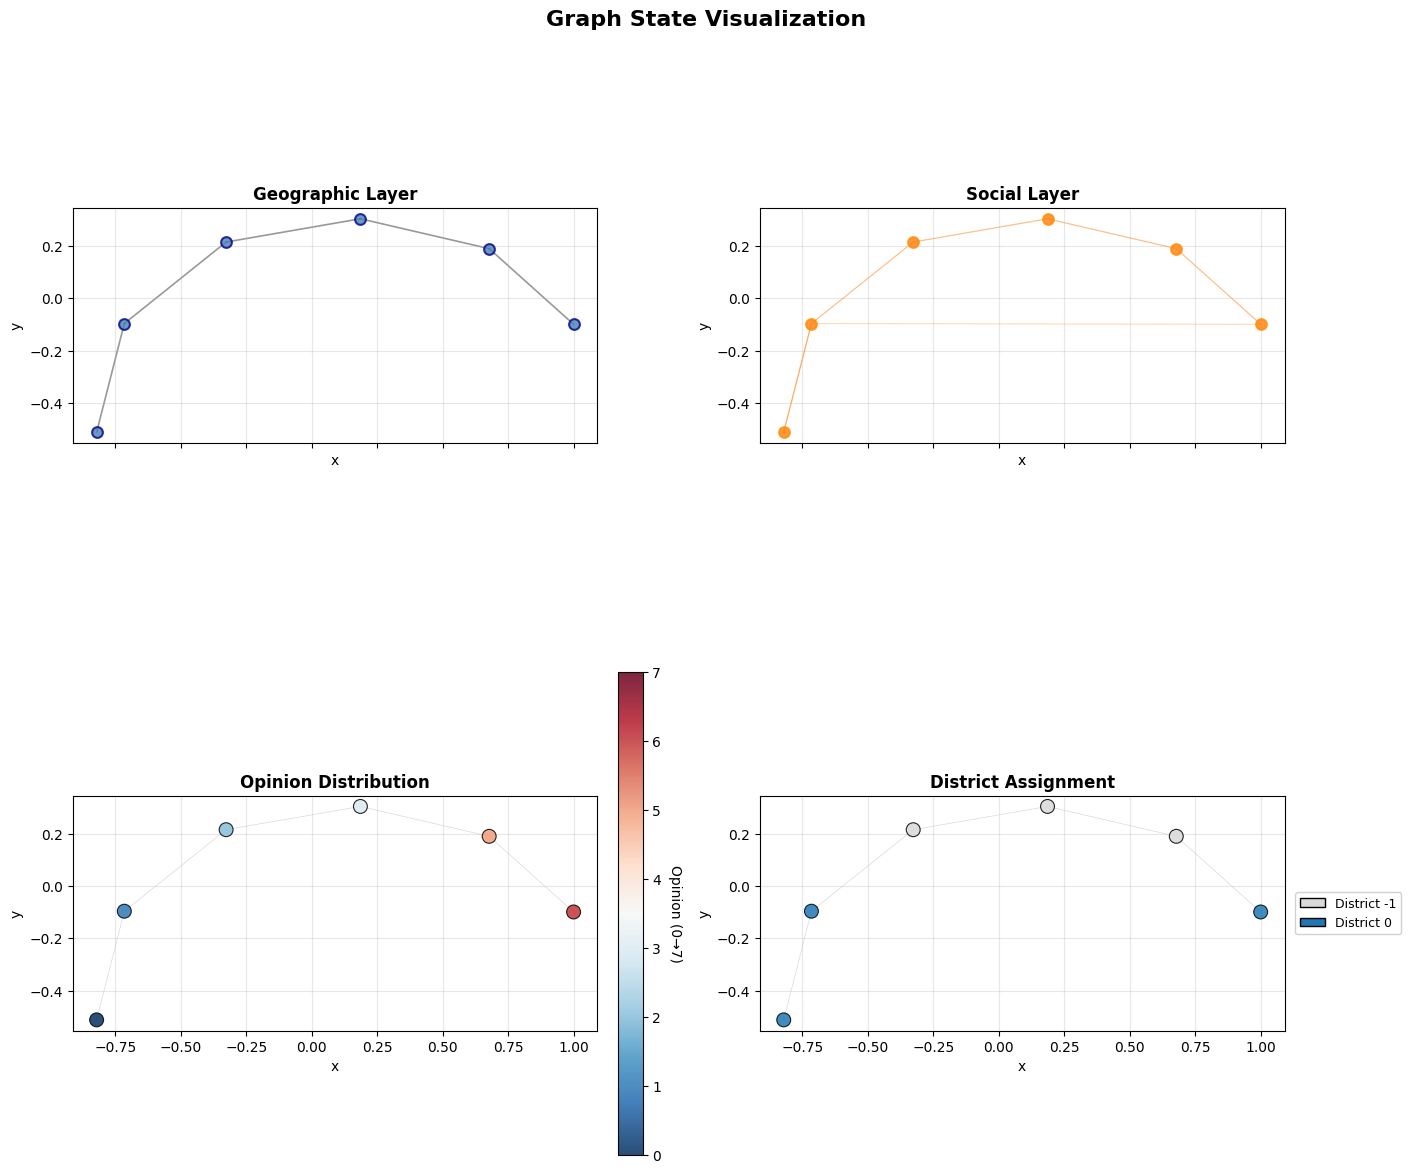

t=1, reps=[1], opinions=[0.0, 1.0, 2.0, 3.0, 5.0, 6.0], reward=0.75


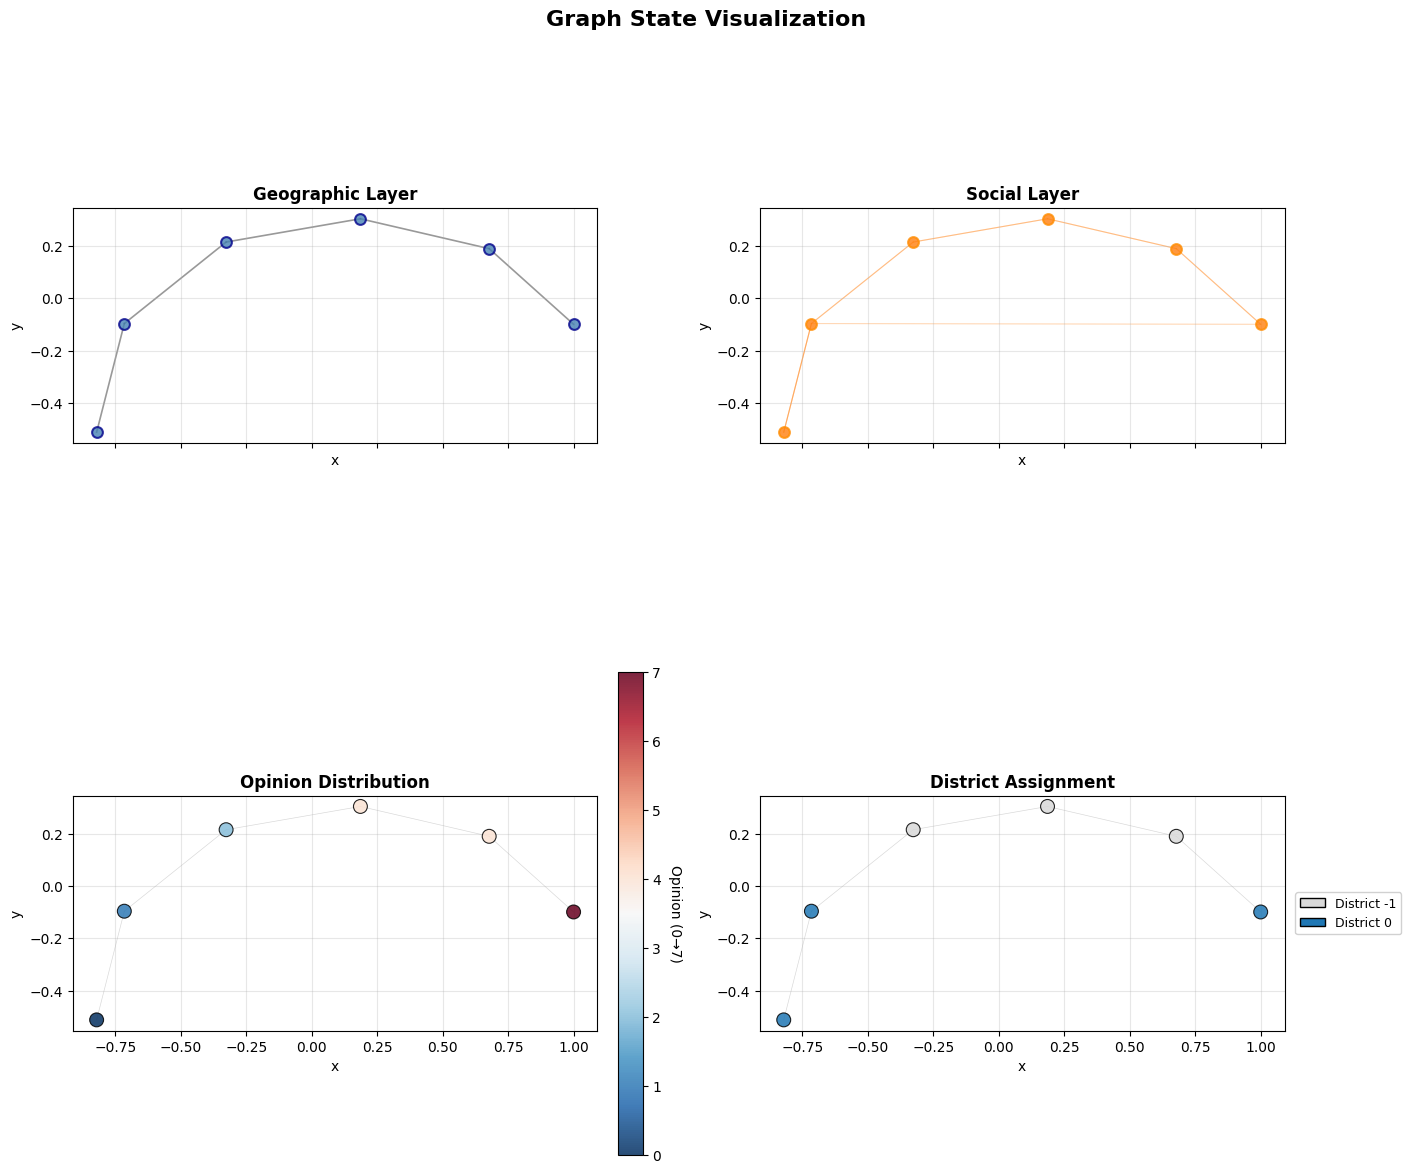

t=2, reps=[1], opinions=[0.0, 1.0, 2.0, 4.0, 4.0, 7.0], reward=0.75


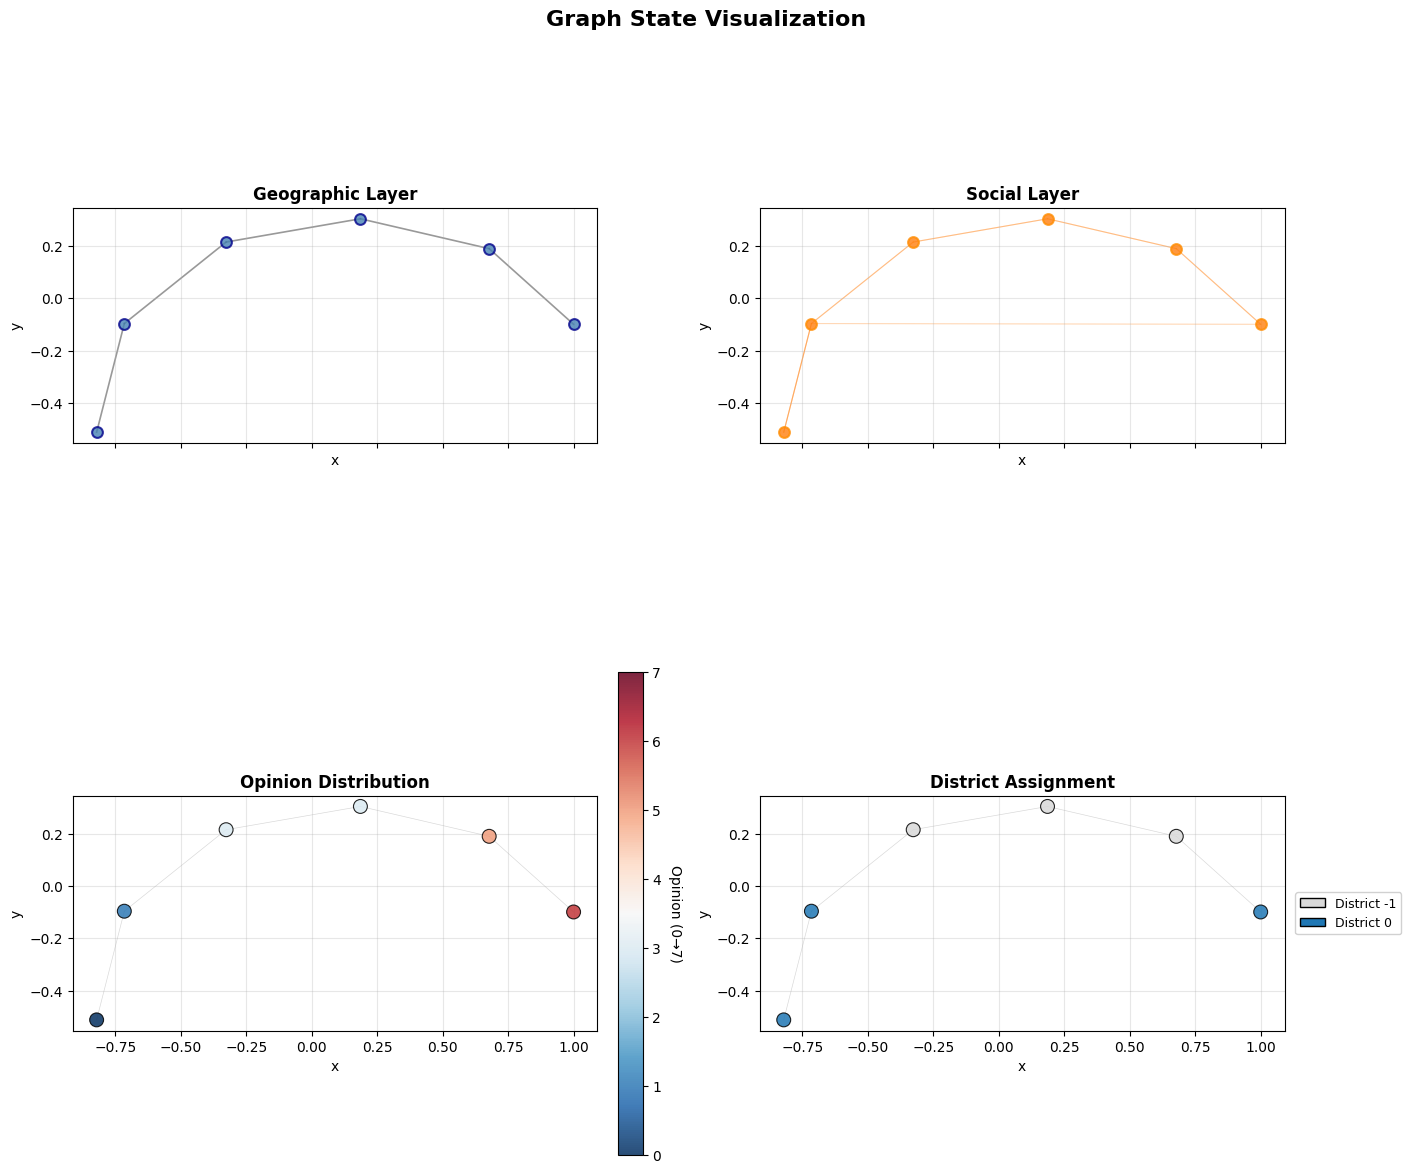

t=3, reps=[1], opinions=[0.0, 1.0, 3.0, 3.0, 5.0, 6.0], reward=-0.25


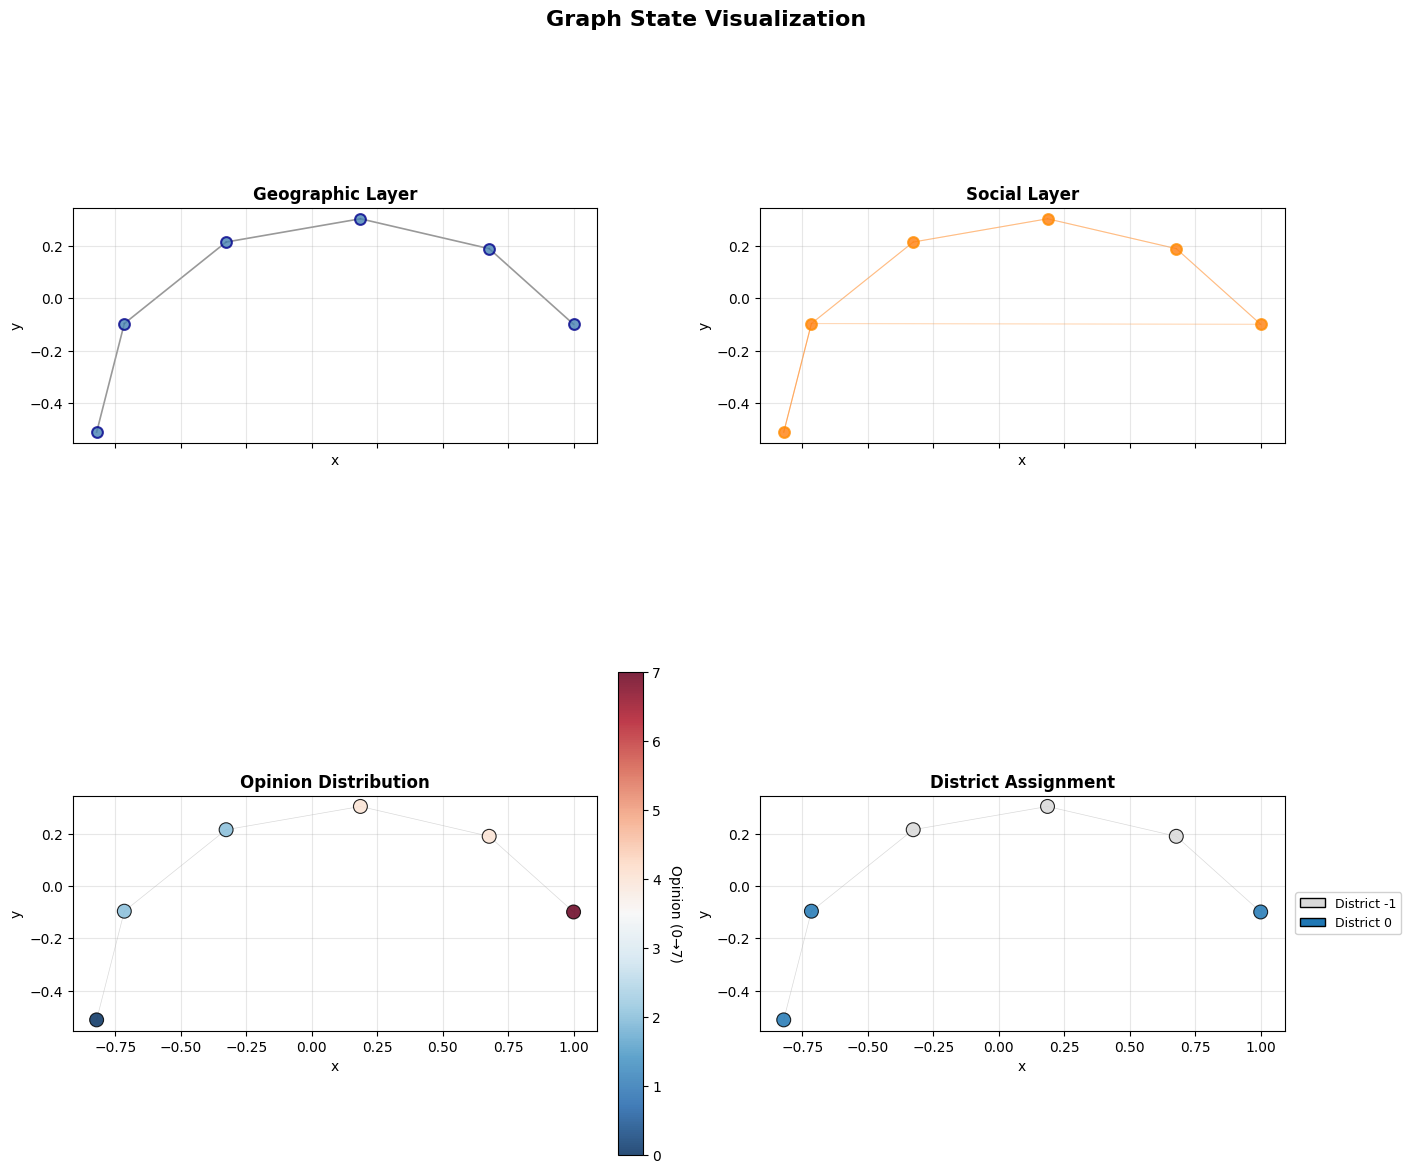

t=4, reps=[1], opinions=[0.0, 2.0, 2.0, 4.0, 4.0, 7.0], reward=0.75


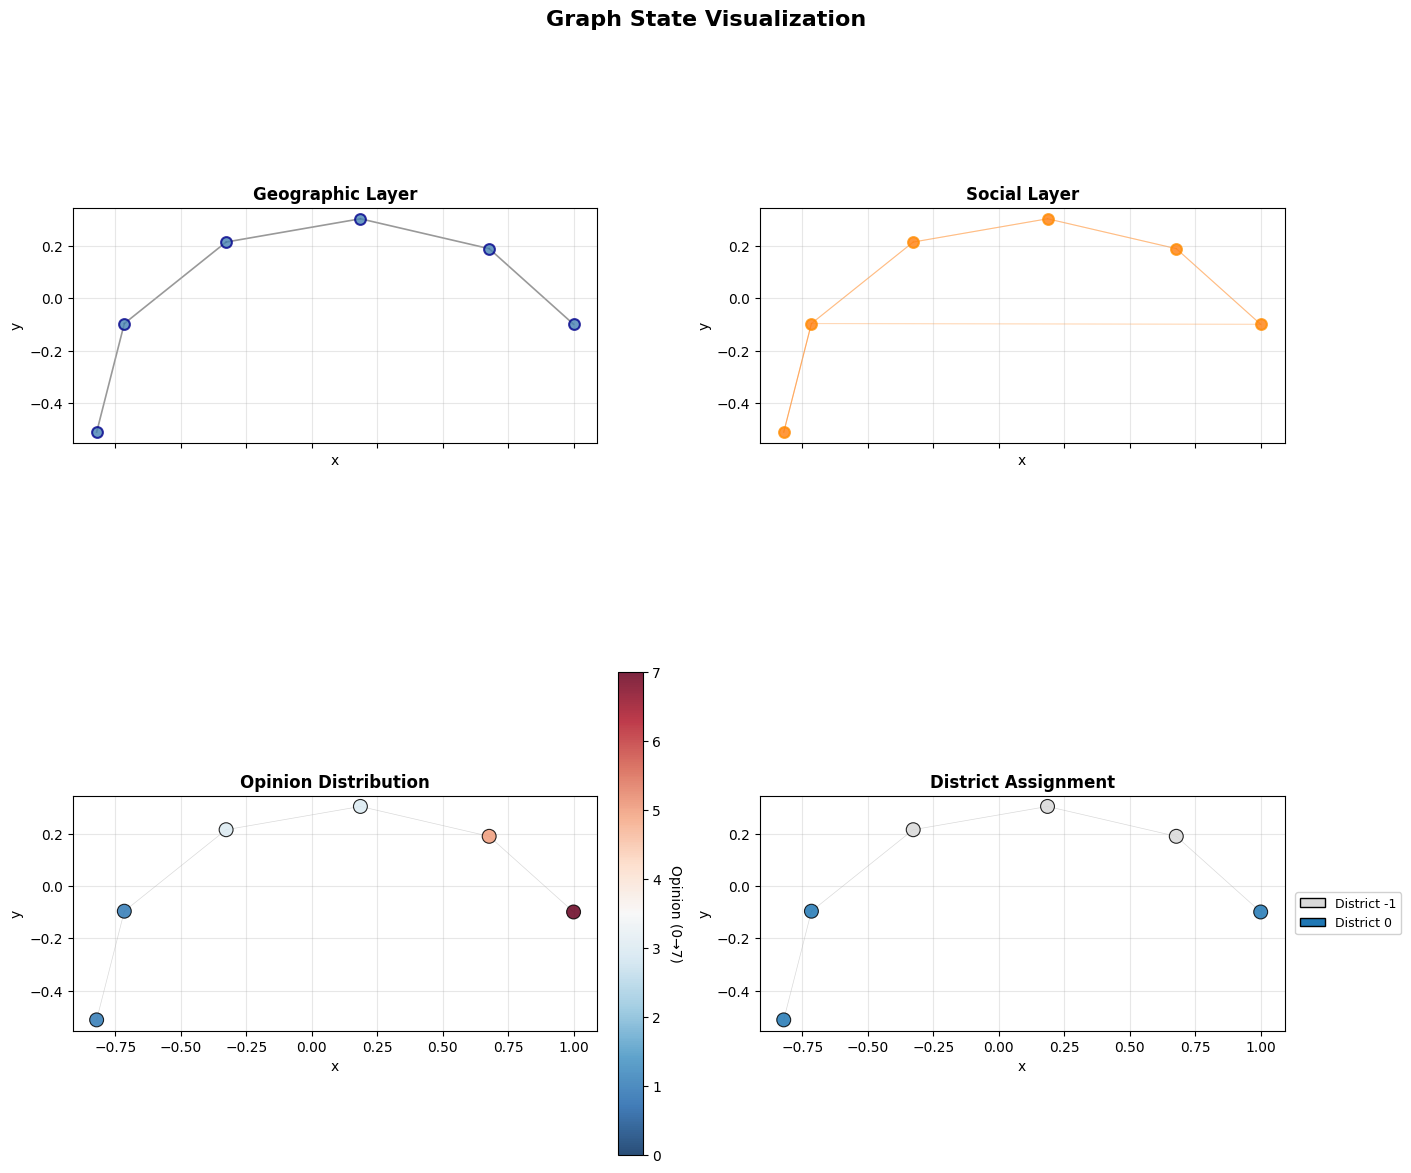

t=5, reps=[1], opinions=[1.0, 1.0, 3.0, 3.0, 5.0, 7.0], reward=0.75


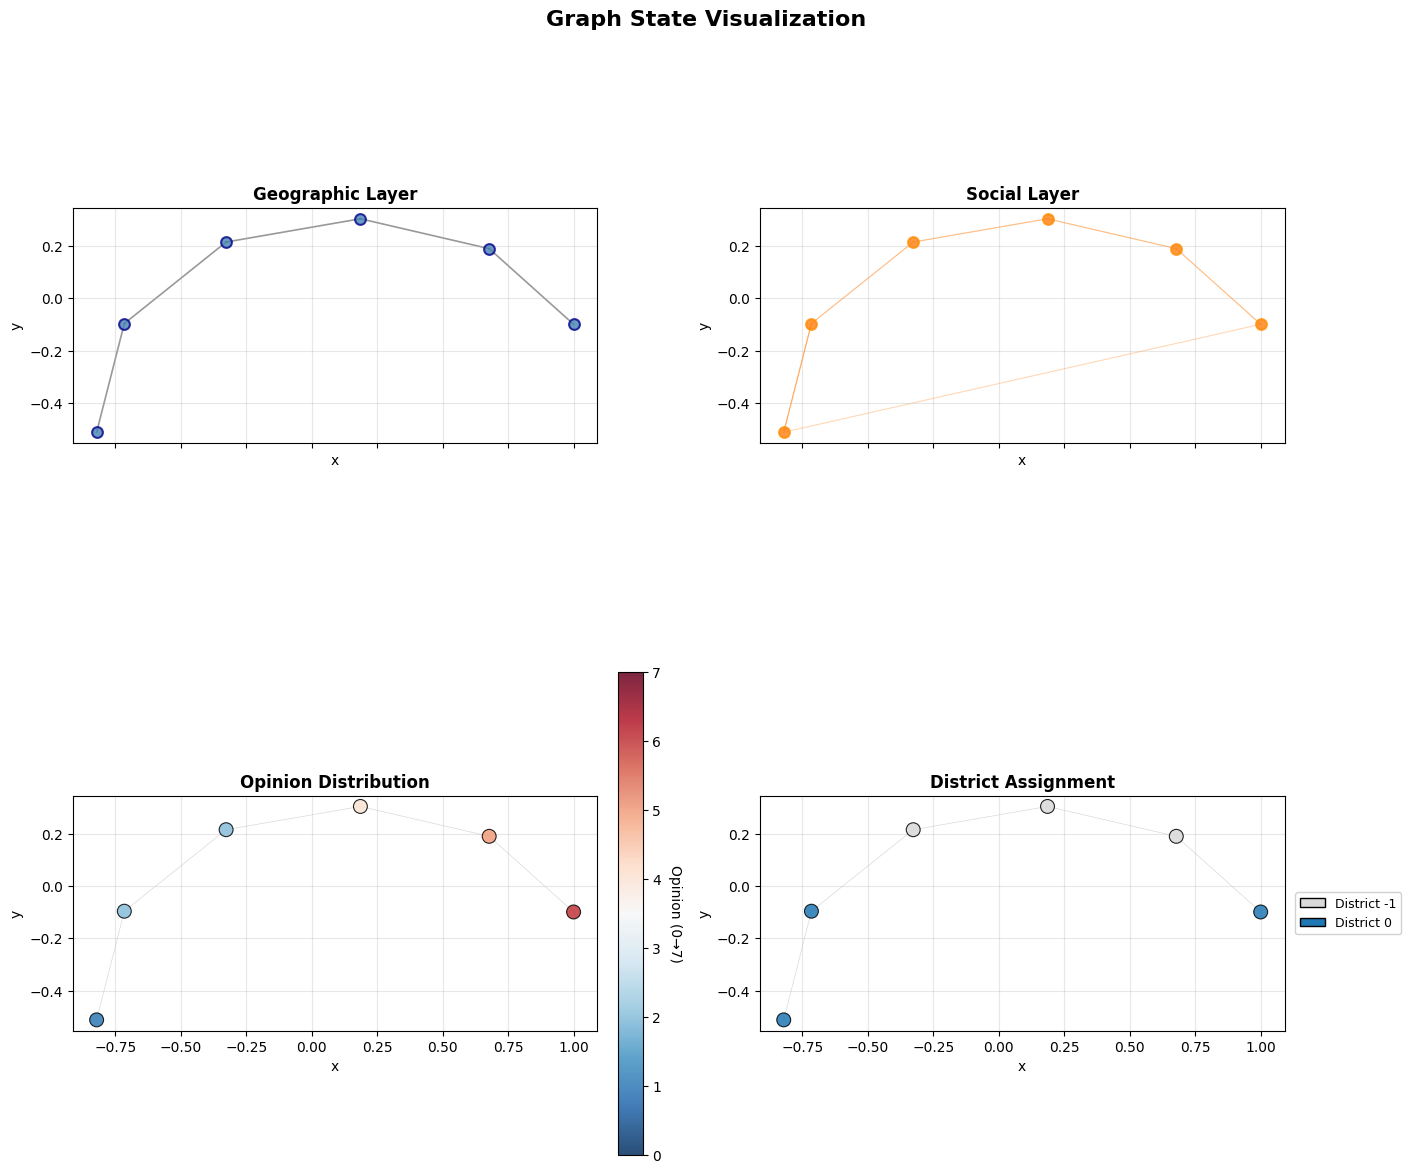

t=6, reps=[0], opinions=[1.0, 2.0, 2.0, 4.0, 5.0, 6.0], reward=-0.25


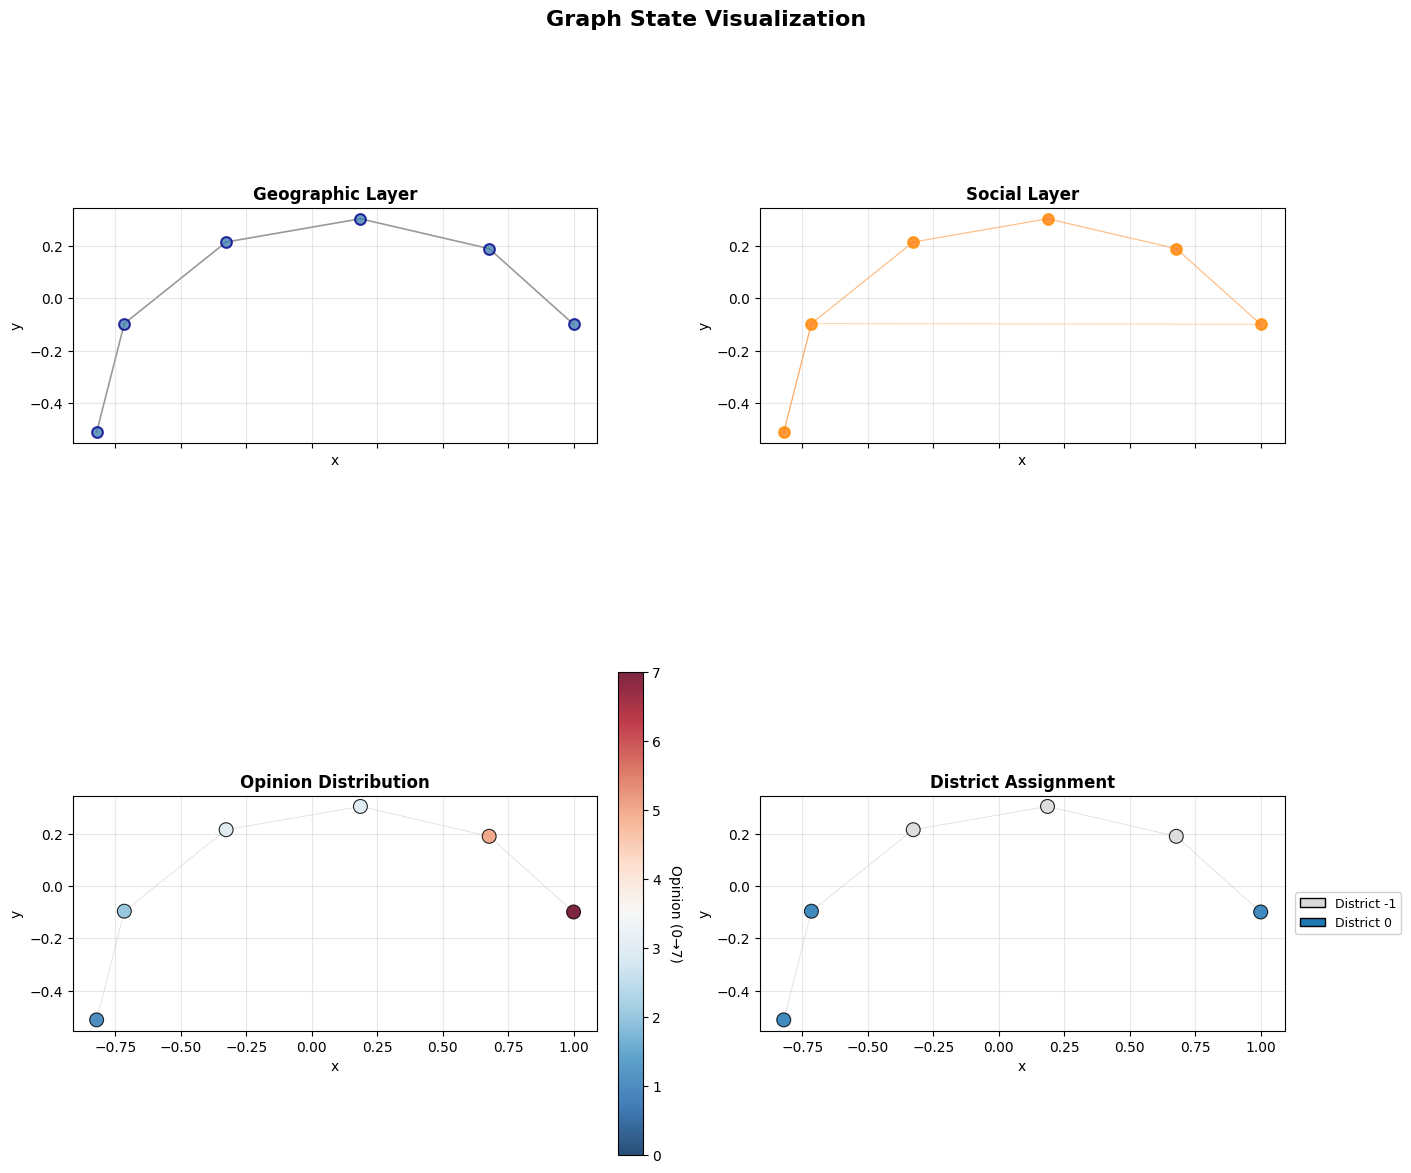

t=7, reps=[1], opinions=[1.0, 2.0, 3.0, 3.0, 5.0, 7.0], reward=0.75


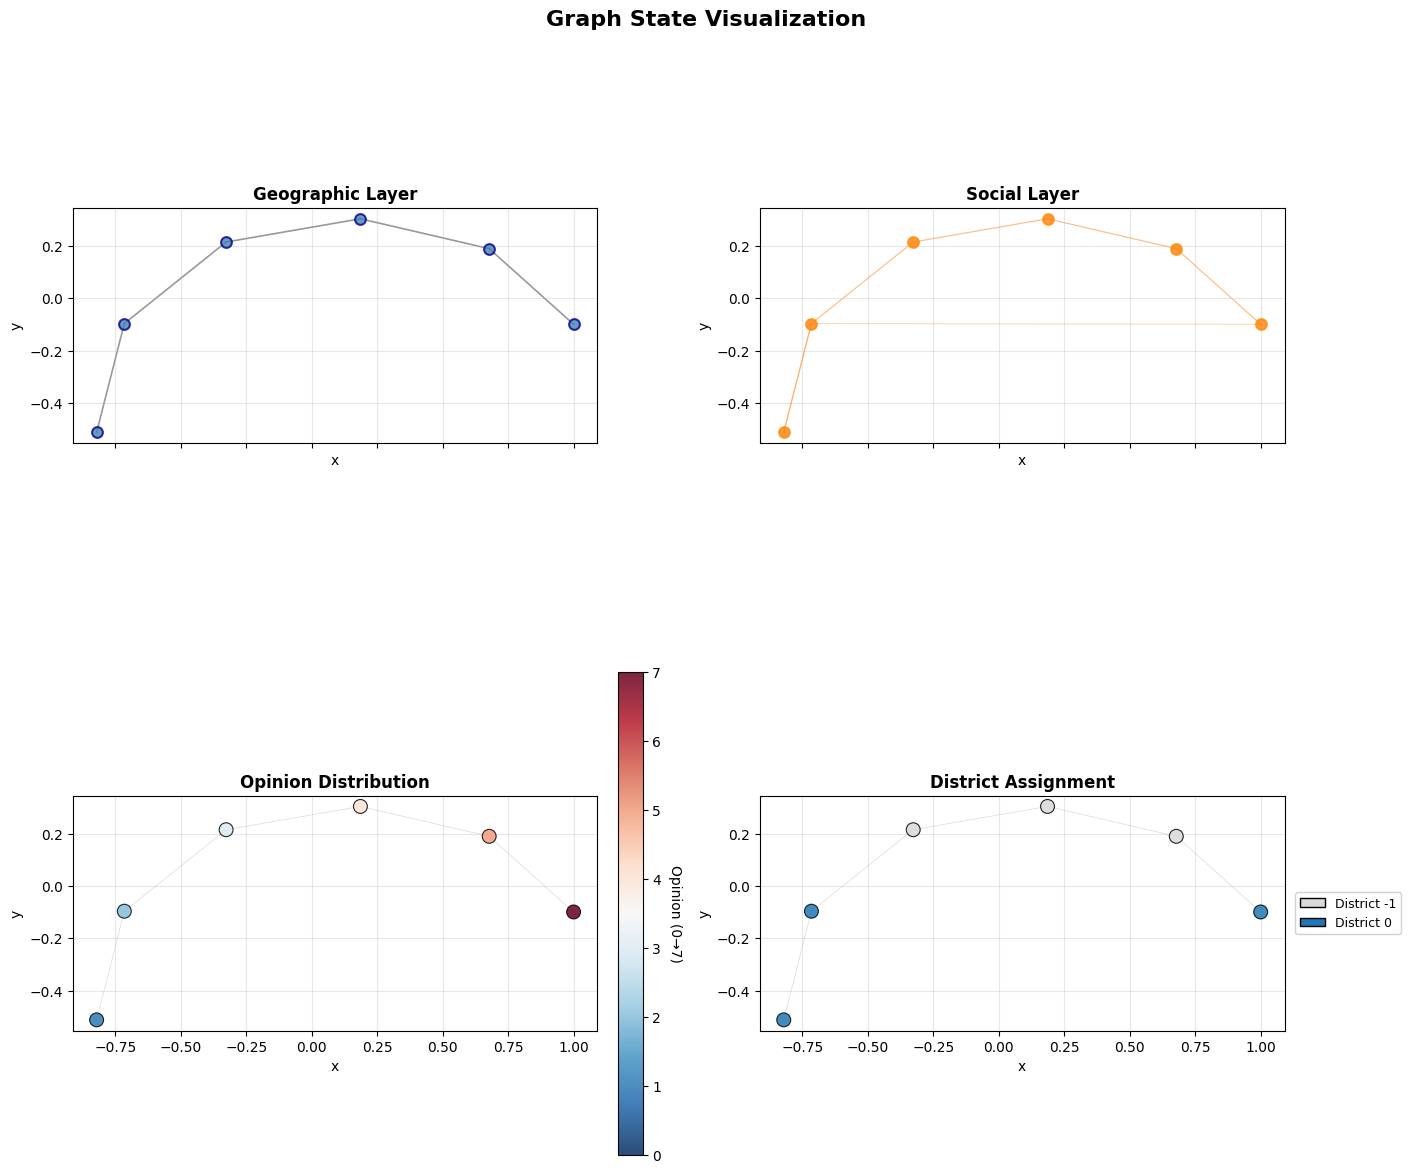

t=8, reps=[1], opinions=[1.0, 2.0, 3.0, 4.0, 5.0, 7.0], reward=0.75


In [5]:
init_inch_soc_data, G_inch = build_inchworm_soc_init_data()

num_voters = init_inch_soc_data.opinion.shape[0]
num_districts = 1

env = FrankenmanderingEnv(num_voters=num_voters,
                          num_districts=num_districts,
                          opinion_dim=1,
                          FrankenData=init_inch_soc_data,
                          target_opinion=[1,2,3,4,5,7])


obs, _ = env.reset()

districts = [
    [0,1,5],
    [0,1,5],
    [0,1,5],
    [0,1,5],
    [0,1,5],
    [0,1,5],
    [0,1,5],
    [0,1,5],
]
history = run_inchworm(env, districts, eps_indiff =2, eps_assim=4, eps_backfire=4 , eps_irrel=6, eps_amb=2,
                                                            assim_shift=1, back_shift=-1, indiff_shift=0, amb_shift=0, irr_shift=0)
